# Evaluación 1 - Entrenando redes feedforward

**Autores:**

+ Lucas Poblete
+ Jorge Riffo

**Correos Electrónicos:**

+ luc.poblete@duocuc.cl
+ j.riffo@duocuc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Deep Learning de la carrera de Ingeniería en Informática de DuocUC sede Concepción.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga de datos

In [ ]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-21 02:38:55--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  24.2MB/s    in 0.4s    

2025-04-21 02:38:56 (24.2 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-04-21 02:38:56--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28

In [ ]:
!ls -lh

total 23M
drwx------ 6 root root 4.0K Apr 21 02:01 drive
-rw-r--r-- 1 root root 5.6M Apr 21 02:21 pesos_red_neuronal_sgd.weights.h5
-rw-r--r-- 1 root root 5.7M Apr 21 02:21 red_neuronal_sgd.h5
drwxr-xr-x 1 root root 4.0K Apr 17 13:36 sample_data
-rw-r--r-- 1 root root 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [ ]:
import gzip
import shutil
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
# Asegurar que las etiquetas están en formato correcto
from keras.utils import to_categorical
from keras.optimizers import SGD

# Carga de imágenes

In [ ]:
# Función para cargar imágenes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Función para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificación

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


In [ ]:
N = X_train.shape[1]
C = y_train.shape[1]

# Muestra imágenes

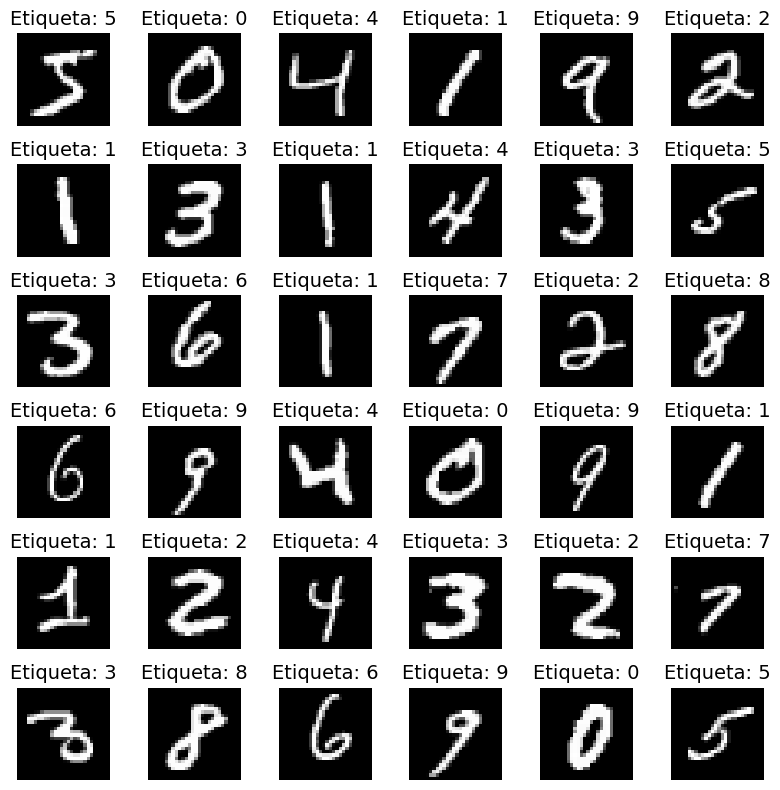

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta: {np.argmax(y_train[i])}', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()

Clase     Cantidad  Porcentaje
--------------------------------
0         5923      9.87%
1         6742      11.24%
2         5958      9.93%
3         6131      10.22%
4         5842      9.74%
5         5421      9.04%
6         5918      9.86%
7         6265      10.44%
8         5851      9.75%
9         5949      9.92%
--------------------------------
Total     60000     100.00%   



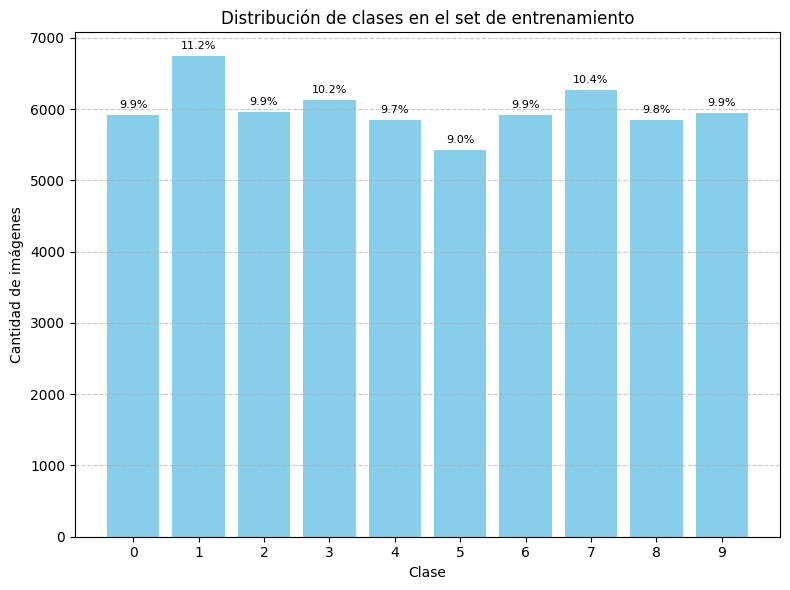

In [ ]:
labels = np.argmax(y_train, axis=1)


class_counts = np.bincount(labels)


total = np.sum(class_counts)

print(f"{'Clase':<10}{'Cantidad':<10}{'Porcentaje':<10}")
print("-" * 32)


for i, count in enumerate(class_counts):
    porcentaje = (count / total) * 100
    print(f"{i:<10}{count:<10}{porcentaje:.2f}%")


print("-" * 32)
print(f"{'Total':<10}{total:<10}{'100.00%':<10}\n")

plt.figure(figsize=(8, 6))
bars = plt.bar(range(10), class_counts, color='skyblue')
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de clases en el set de entrenamiento")
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, count in zip(bars, class_counts):
    porcentaje = (count / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100,
             f"{porcentaje:.1f}%", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

**** ORDENAR ****

## Arquitectura

Para la arquitectura de los modelos con el optimizador SGD se establecio la cantidad de 512 neuronas para la 1era capa, 256 para la 2da capa y 128 para la 3 capa, todo esto con el fin de tener una arquitectura con gran cantidad de neuronas las cuales permitira que la red aprenda patrones mas complejos y con esto obtener una clasificación mas exacta. En base a esta arquitectura se ira experimentado con las funciones de activacion, salidad, perdida, hiperparametros y tecnicas de optimización.

Las funciones de la arquitectura varian desde funciones que se aplican especificamente en casos donde hay mas de una clase y tambien se implementó funciones las cuales solo funcionan con solo una clase, se tiene en conocimiento y tambien esta dentro de lo esperado que estas funciones las cuales solo se aplican en proyectos con una sola clase, tenga un rendimiento realmente bajo igualmente todo es en base a la experimentación, con esta experimentacion se espera poder obtener en evidencia los rendimientos que se puedan obtener de los distintos modelos, esto en base a la metrica seleccionada.

### Modelo 1
sgd, relu, softmax, categorical_crossentropy

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd = keras.Sequential(name="Red_Neuronal_sgd")
red_sgd.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd.add(keras.layers.Dense(h1, activation='relu'))
red_sgd.add(keras.layers.Dense(h2, activation='relu'))
red_sgd.add(keras.layers.Dense(h3, activation='relu'))
red_sgd.add(keras.layers.Dense(C, activation='softmax'))

red_sgd.summary()

red_sgd.compile(
    loss= 'categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 2
 sgd, relu, softmax, categorical_crossentropy y learning rate

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_lr = keras.Sequential(name="Red_Neuronal_sgd")
red_sgd_lr.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_lr.add(keras.layers.Dense(h1, activation='relu'))
red_sgd_lr.add(keras.layers.Dense(h2, activation='relu'))
red_sgd_lr.add(keras.layers.Dense(h3, activation='relu'))
red_sgd_lr.add(keras.layers.Dense(C, activation='softmax'))

red_sgd_lr.summary()

red_sgd_lr.compile(
    loss= 'categorical_crossentropy',
    optimizer=SGD(learning_rate=0.1),
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 3
sgd, relu, softmax, binary_crossentropy

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_binary_soft = keras.Sequential(name="Red_Neuronal_sgd")
red_sgd_binary_soft.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_binary_soft.add(keras.layers.Dense(h1, activation='relu'))
red_sgd_binary_soft.add(keras.layers.Dense(h2, activation='relu'))
red_sgd_binary_soft.add(keras.layers.Dense(h3, activation='relu'))
red_sgd_binary_soft.add(keras.layers.Dense(C, activation='softmax'))

red_sgd_binary_soft.summary()

red_sgd_binary_soft.compile(
    loss= 'binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 4
sgd, relu, sigmoid, categorical_crossentropy

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_sigmoid_cat = keras.Sequential(name="Red_Neuronal_sgd")
red_sgd_sigmoid_cat.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_sigmoid_cat.add(keras.layers.Dense(h1, activation='relu'))
red_sgd_sigmoid_cat.add(keras.layers.Dense(h2, activation='relu'))
red_sgd_sigmoid_cat.add(keras.layers.Dense(h3, activation='relu'))
red_sgd_sigmoid_cat.add(keras.layers.Dense(C, activation='sigmoid'))

red_sgd_sigmoid_cat.summary()

red_sgd_sigmoid_cat.compile(
    loss= 'categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 5
sgd, relu, softmax, categorical_crossentropy y **dropout**

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_dropout = keras.Sequential(name="Red_Neuronal_sgd_dropout")
red_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_dropout.add(keras.layers.Dropout(0.3))
red_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_dropout.add(keras.layers.Dropout(0.1))
red_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_dropout.summary()

red_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 6
sgd, relu, softmax, categorical_crossentropy, dropout y learning rate

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_dropout_lr = keras.Sequential(name="Red_Neuronal_sgd_dropout")
red_dropout_lr.add(keras.layers.Input(shape=(N,), name='entrada'))
red_dropout_lr.add(keras.layers.Dense(h1, activation='relu'))
red_dropout_lr.add(keras.layers.Dense(h2, activation='relu'))
red_dropout_lr.add(keras.layers.Dropout(0.3))
red_dropout_lr.add(keras.layers.Dense(h3, activation='relu'))
red_dropout_lr.add(keras.layers.Dropout(0.1))
red_dropout_lr.add(keras.layers.Dense(C, activation='softmax'))

red_dropout_lr.summary()

red_dropout_lr.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.1),
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 7
sgd, tanh, softmax, categorial_crossentropy

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_sigmoid = keras.Sequential(name="Red_Neuronal_sgd")
red_sgd_sigmoid.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_sigmoid.add(keras.layers.Dense(h1, activation='tanh'))
red_sgd_sigmoid.add(keras.layers.Dense(h2, activation='tanh'))
red_sgd_sigmoid.add(keras.layers.Dense(h3, activation='tanh'))
red_sgd_sigmoid.add(keras.layers.Dense(C, activation='softmax'))

red_sgd_sigmoid.summary()

red_sgd_sigmoid.compile(
    loss= 'categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 8
sgd, tanh, sigmoid, categorial_crossentropy y learning rate

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_sigmoid_lr = keras.Sequential(name="Red_Neuronal_sgd")
red_sgd_sigmoid_lr.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_sigmoid_lr.add(keras.layers.Dense(h1, activation='tanh'))
red_sgd_sigmoid_lr.add(keras.layers.Dense(h2, activation='tanh'))
red_sgd_sigmoid_lr.add(keras.layers.Dense(h3, activation='tanh'))
red_sgd_sigmoid_lr.add(keras.layers.Dense(C, activation='sigmoid'))

red_sgd_sigmoid_lr.summary()

red_sgd_sigmoid_lr.compile(
    loss= 'categorical_crossentropy',
    optimizer=SGD(learning_rate=0.1),
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 9
sgd, tanh, sigmoid, binary_crossentropy

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_binary = keras.Sequential(name="Red_Neuronal_sgd_binary")
red_sgd_binary.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_binary.add(keras.layers.Dense(h1, activation='tanh'))
red_sgd_binary.add(keras.layers.Dense(h2, activation='tanh'))
red_sgd_binary.add(keras.layers.Dense(h3, activation='tanh'))
red_sgd_binary.add(keras.layers.Dense(C, activation='sigmoid'))

red_sgd_binary.summary()

red_sgd_binary.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd_binary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 10
sgd, tanh, sigmoid, binary_crossentropy y learning rate

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_binary_lr = keras.Sequential(name="Red_Neuronal_sgd_binary")
red_sgd_binary_lr.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_binary_lr.add(keras.layers.Dense(h1, activation='tanh'))
red_sgd_binary_lr.add(keras.layers.Dense(h2, activation='tanh'))
red_sgd_binary_lr.add(keras.layers.Dense(h3, activation='tanh'))
red_sgd_binary_lr.add(keras.layers.Dense(C, activation='sigmoid'))

red_sgd_binary_lr.summary()

red_sgd_binary_lr.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=0.1),
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd_binary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 11
sgd, tanh, sigmoid, binary_crossentropy y dropout

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_binary_dropout = keras.Sequential(name="Red_Neuronal_sgd_binary")
red_sgd_binary_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_binary_dropout.add(keras.layers.Dense(h1, activation='tanh'))
red_sgd_binary_dropout.add(keras.layers.Dense(h2, activation='tanh'))
red_sgd_binary_dropout.add(keras.layers.Dropout(0.3))
red_sgd_binary_dropout.add(keras.layers.Dense(h3, activation='tanh'))
red_sgd_binary_dropout.add(keras.layers.Dropout(0.1))
red_sgd_binary_dropout.add(keras.layers.Dense(C, activation='sigmoid'))

red_sgd_binary_dropout.summary()

red_sgd_binary_dropout.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd_binary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 12
sgd, tanh, sigmoid, binary_crossentropy, dropout y learning rate

In [ ]:
h1 = 512
h2 = 256
h3 = 128

red_sgd_binary_dropout_lr = keras.Sequential(name="Red_Neuronal_sgd_binary")
red_sgd_binary_dropout_lr.add(keras.layers.Input(shape=(N,), name='entrada'))
red_sgd_binary_dropout_lr.add(keras.layers.Dense(h1, activation='tanh'))
red_sgd_binary_dropout_lr.add(keras.layers.Dense(h2, activation='tanh'))
red_sgd_binary_dropout_lr.add(keras.layers.Dropout(0.3))
red_sgd_binary_dropout_lr.add(keras.layers.Dense(h3, activation='tanh'))
red_sgd_binary_dropout_lr.add(keras.layers.Dropout(0.1))
red_sgd_binary_dropout_lr.add(keras.layers.Dense(C, activation='sigmoid'))

red_sgd_binary_dropout_lr.summary()

red_sgd_binary_dropout_lr.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=0.1),
    metrics=['accuracy']
)

Model: "Red_Neuronal_sgd_binary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Para todos estos modelo se aplicaron distintas funciones las cuales son:

*   Activación: ReLu y Sigmoid
*   Salida: Softmax y Sigmoid
*   Perdida: Categorical_crossentropy y Binary_crossentropy



In [ ]:
def plot_history(hist, name_model):

  # Crear figura con dos subplots horizontales
  fig, axs = plt.subplots(1, 2, figsize=(14, 5))

  fig.suptitle(name_model, fontweight="bold", fontsize=18)

  # --- Pérdida ---
  axs[0].plot(hist.history['loss'], label='Training Loss')
  axs[0].plot(hist.history['val_loss'], label='Validation Loss')
  axs[0].set_title('Pérdida', fontweight="bold", fontsize=16)
  axs[0].set_xlabel('Época', fontweight="bold", fontsize=14)
  axs[0].set_ylabel('Loss', fontweight="bold", fontsize=14)
  axs[0].legend()
  axs[0].grid(True)

  # --- Precisión ---
  axs[1].plot(hist.history['accuracy'], label='Training Accuracy')
  axs[1].plot(hist.history['val_accuracy'], label='Validation Accuracy')
  axs[1].set_title('% Acierto', fontweight="bold", fontsize=16)
  axs[1].set_xlabel('Época', fontweight="bold", fontsize=14)
  axs[1].set_ylabel('Accuracy', fontweight="bold", fontsize=14)
  axs[1].legend()
  axs[1].grid(True)

  plt.tight_layout()
  plt.show()

## Entrenamiento

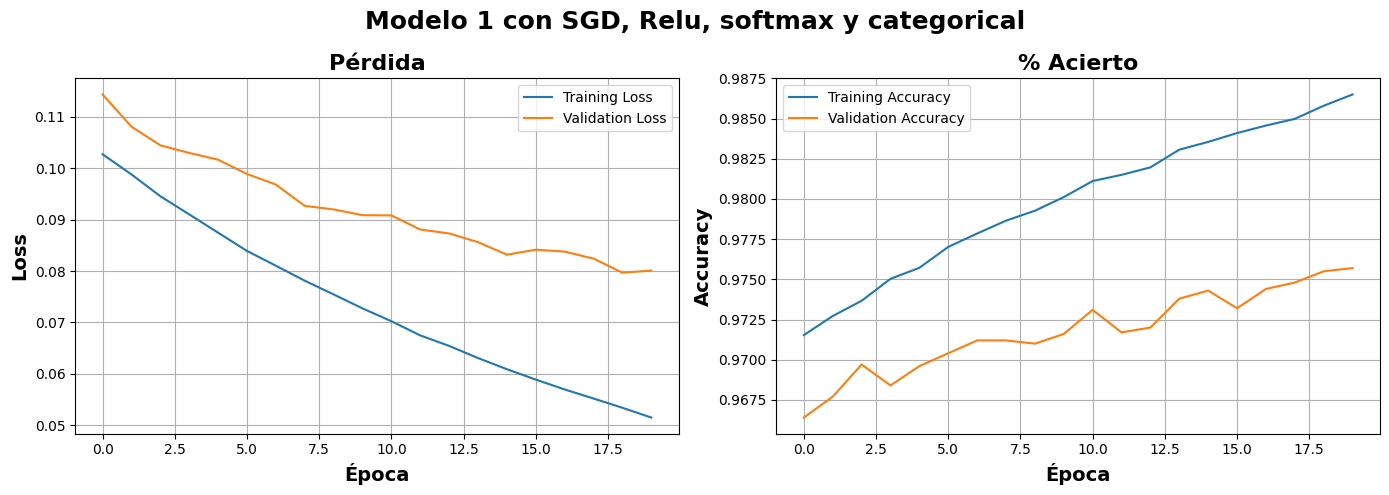

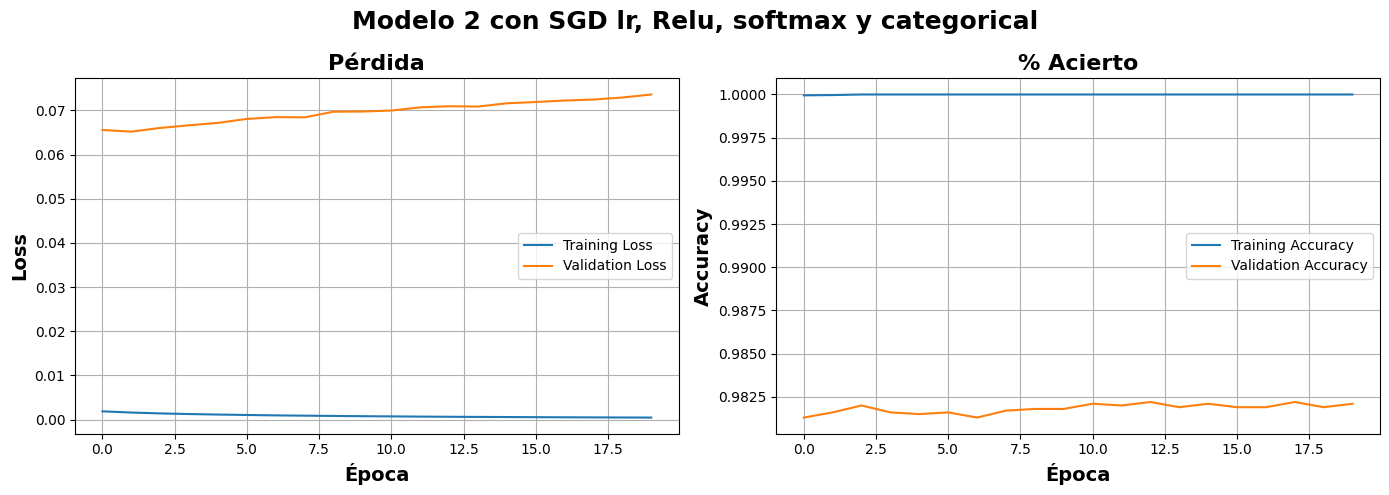

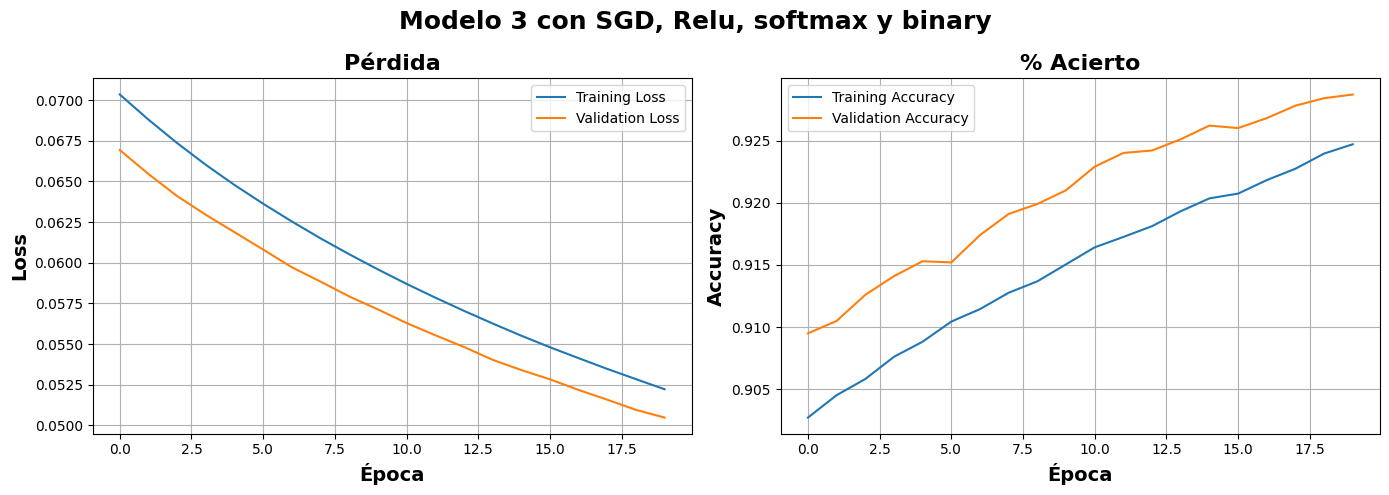

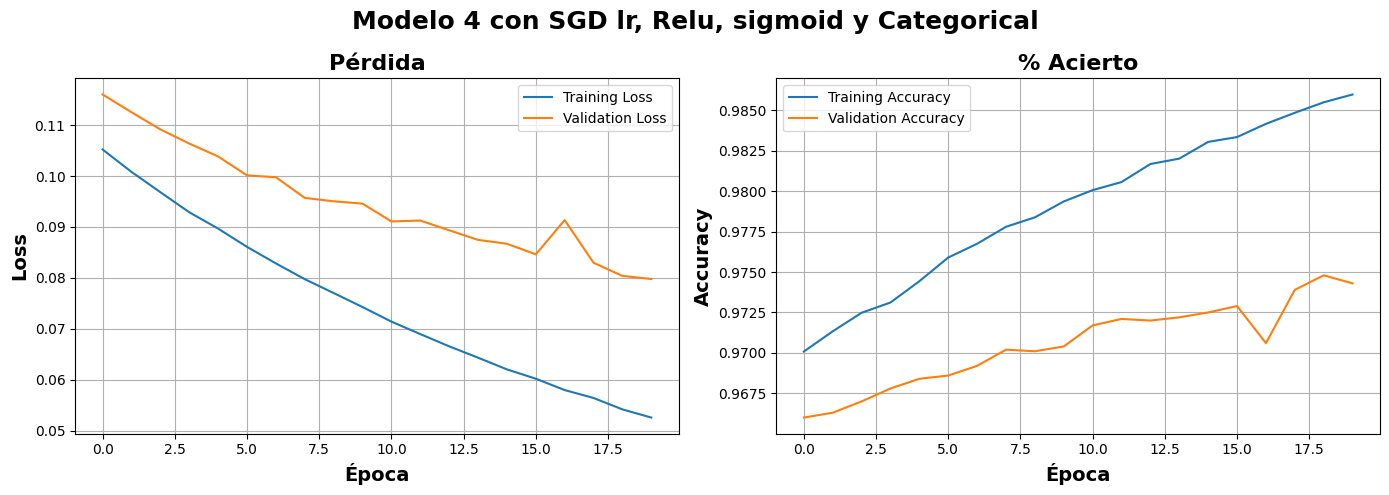

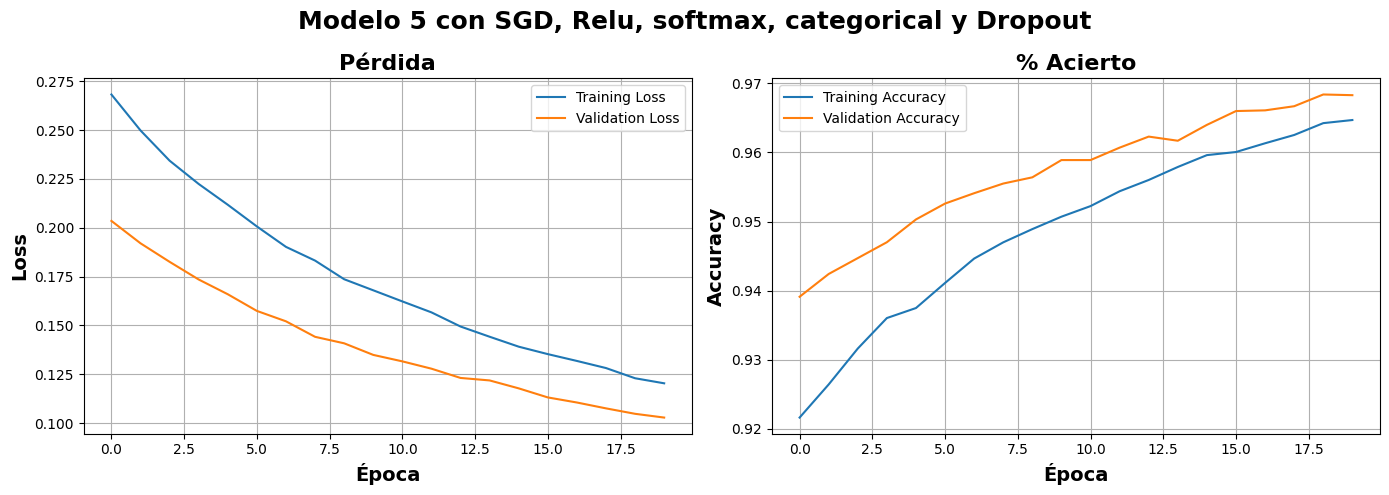

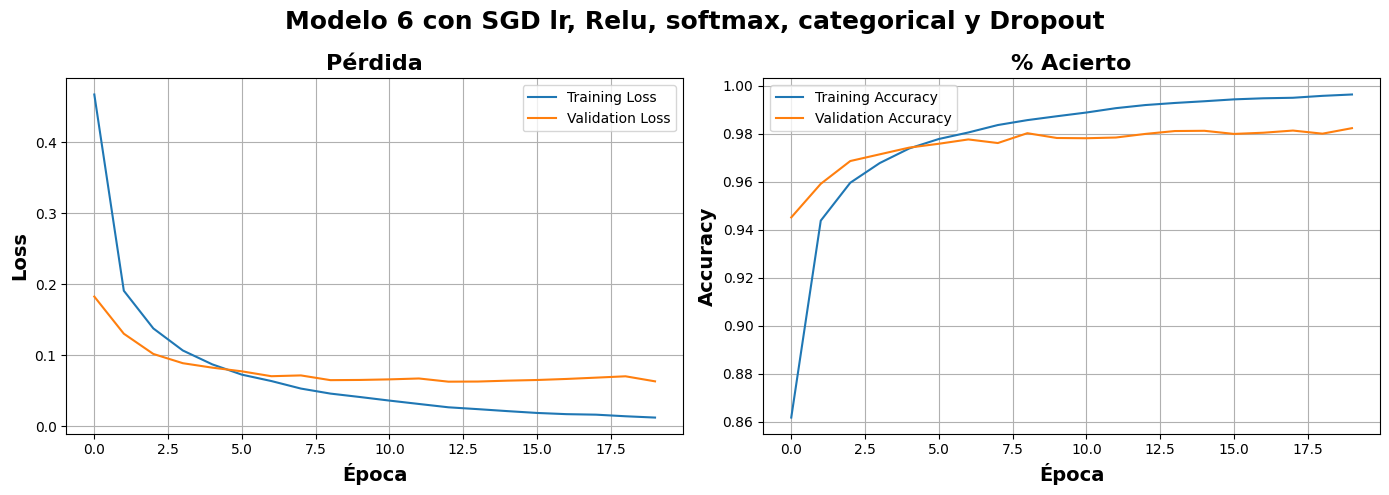

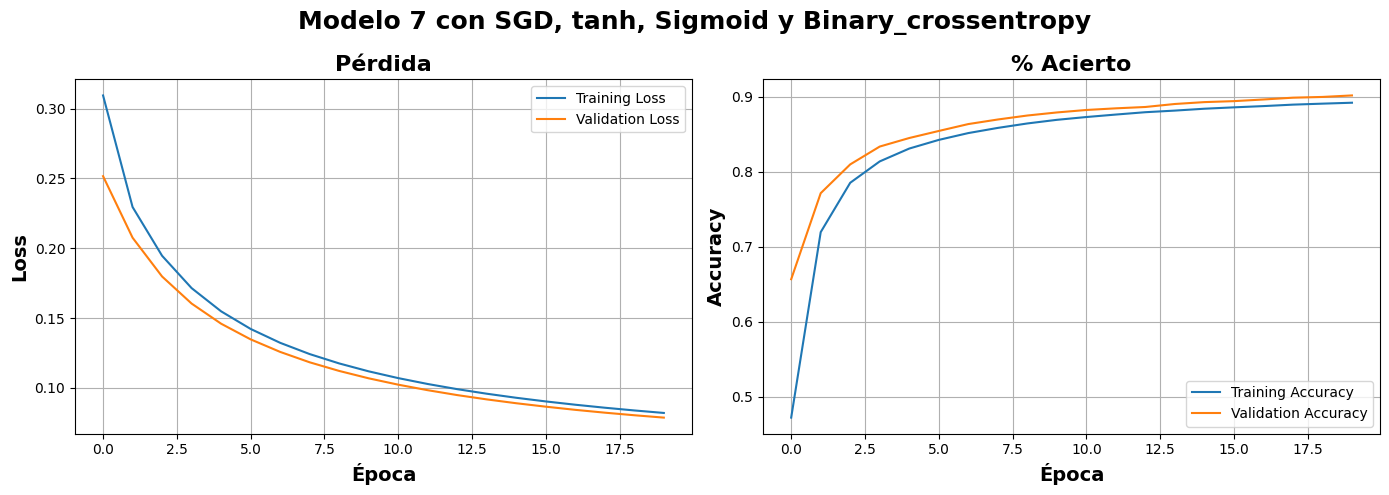

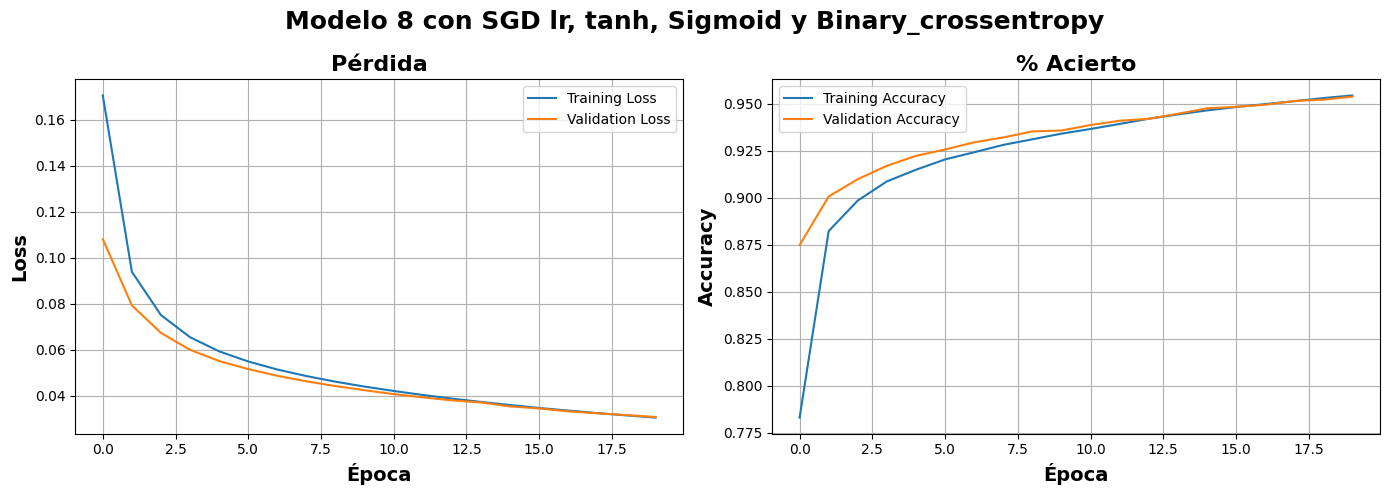

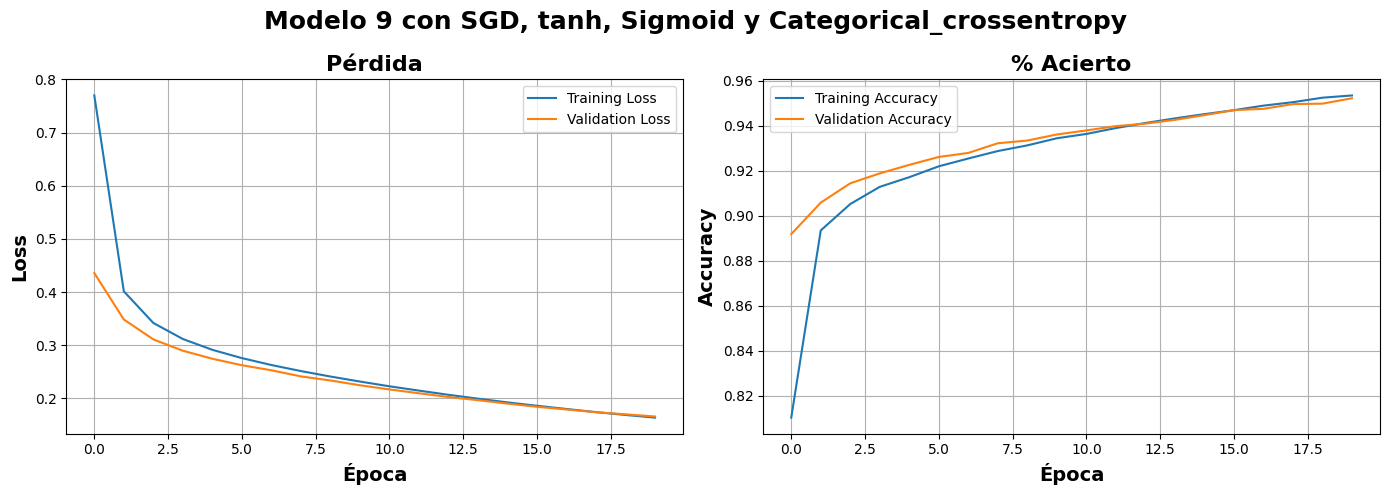

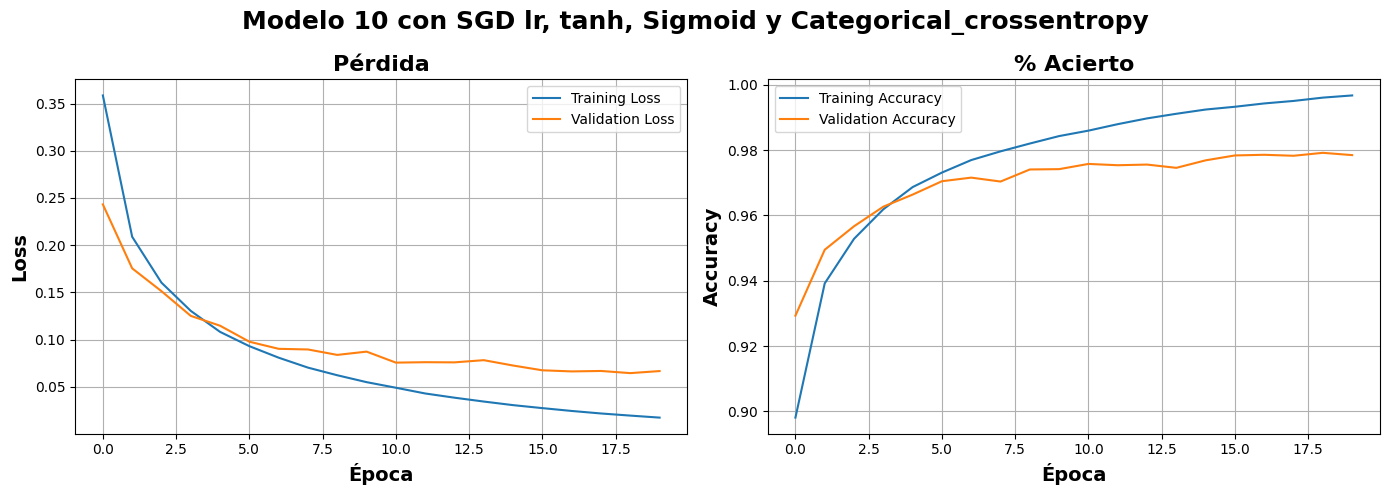

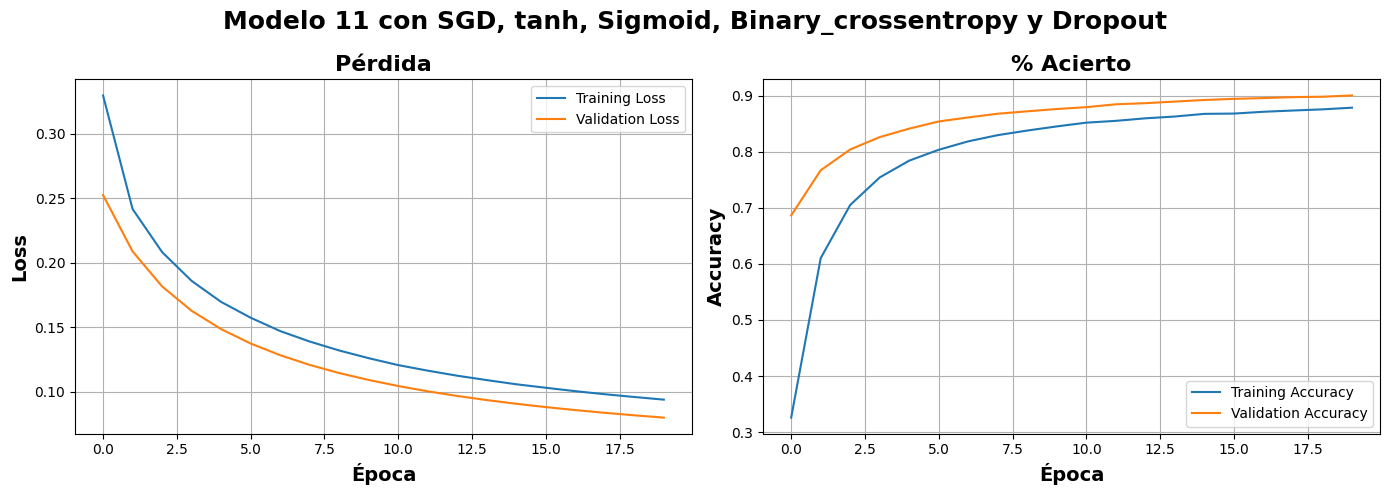

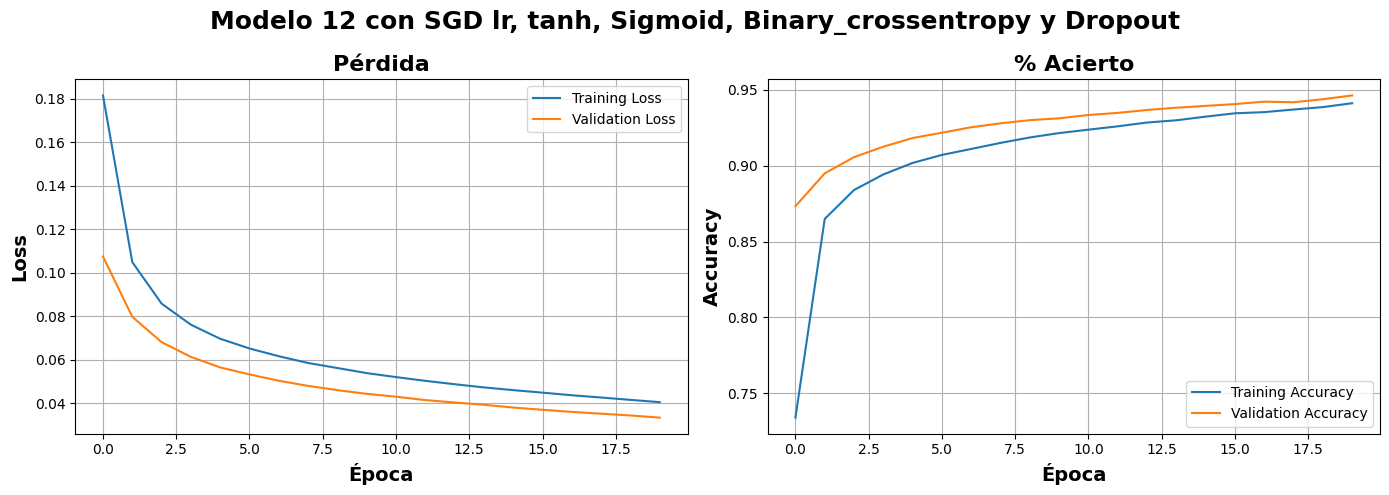

In [ ]:
resultados = []


modelos = [
    ('Modelo 1 con SGD, Relu, softmax y categorical', red_sgd), # Relu, Softmax, Categorical_crossentropy y SGD.
    ('Modelo 2 con SGD lr, Relu, softmax y categorical', red_sgd_lr), # Relu, Softmax, Categorical_crossentropy y SGD con Learning Rate.
    ('Modelo 3 con SGD, Relu, softmax y binary', red_sgd_binary_soft), # Relu, Softmax, Binary_crossentropy y SGD.
    ('Modelo 4 con SGD lr, Relu, sigmoid y Categorical', red_sgd_sigmoid_cat), # Relu, sigmoid, Categorical_crossentropy y SGD con Learning Rate.
    ('Modelo 5 con SGD, Relu, softmax, categorical y Dropout', red_dropout), # Relu, Softmax, Categorical_crossentropy, SGD y Dropout.
    ('Modelo 6 con SGD lr, Relu, softmax, categorical y Dropout', red_dropout_lr), # Relu, Softmax, Categorical_crossentropy, SGD con Learning Rate y Dropout.
    ('Modelo 7 con SGD, tanh, Sigmoid y Binary_crossentropy', red_sgd_binary), # tanh, Sigmoid, Binary_crossentropy y SGD.
    ('Modelo 8 con SGD lr, tanh, Sigmoid y Binary_crossentropy', red_sgd_binary_lr), # tanh, Sigmoid, Binary_crossentropy y SGD con Learning Rate.
    ('Modelo 9 con SGD, tanh, Sigmoid y Categorical_crossentropy', red_sgd_sigmoid), # tanh, Sigmoid, Categorical_crossentropy y SGD.
    ('Modelo 10 con SGD lr, tanh, Sigmoid y Categorical_crossentropy', red_sgd_sigmoid_lr), # tanh, Sigmoid, Categorical_crossentropy y SGD con Learning Rate.
    ('Modelo 11 con SGD, tanh, Sigmoid, Binary_crossentropy y Dropout', red_sgd_binary_dropout), # tanh, Sigmoid, Binary_crossentropy, SGD y Dropout.
    ('Modelo 12 con SGD lr, tanh, Sigmoid, Binary_crossentropy y Dropout', red_sgd_binary_dropout_lr), # tanh, Sigmoid, Binary_crossentropy, SGD con Learning Rate y Dropout.
]


for nombre_modelo, modelo in modelos:
    hist = modelo.fit(
        X_train, y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test, y_test),
        verbose=0
    )

    plot_history(hist, nombre_modelo)

    print('\n')

    train_acc = hist.history['accuracy'][-1]
    val_acc = hist.history['val_accuracy'][-1]
    train_loss = hist.history['loss'][-1]
    val_loss = hist.history['val_loss'][-1]


    resultados.append({
        'Modelo': nombre_modelo,
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    })

df_resultados = pd.DataFrame(resultados)

## Resultados

In [ ]:
df_resultados.sort_values(by='Train Accuracy', ascending=False)

,Modelo,Train Accuracy,Val Accuracy,Train Loss,Val Loss
1,"Modelo 2 con SGD lr, Relu, softmax y categorical",1.000000,0.9821,0.000445,0.073616
9,"Modelo 10 con SGD lr, tanh, Sigmoid y Categori...",0.996783,0.9785,0.017452,0.066740
5,"Modelo 6 con SGD lr, Relu, softmax, categorica...",0.996433,0.9824,0.012484,0.063517
0,"Modelo 1 con SGD, Relu, softmax y categorical",0.986500,0.9757,0.051481,0.080077
3,"Modelo 4 con SGD lr, Relu, sigmoid y Categorical",0.985983,0.9743,0.052610,0.079797
4,"Modelo 5 con SGD, Relu, softmax, categorical y...",0.964700,0.9683,0.120404,0.102871
7,"Modelo 8 con SGD lr, tanh, Sigmoid y Binary_cr...",0.954450,0.9538,0.030609,0.030856
8,"Modelo 9 con SGD, tanh, Sigmoid y Categorical_...",0.953550,0.9523,0.163734,0.165797
11,"Modelo 12 con SGD lr, tanh, Sigmoid, Binary_cr...",0.941267,0.9464,0.040598,0.033498
2,"Modelo 3 con SGD, Relu, softmax y binary",0.924700,0.9287,0.052222,0.050482


| Modelo Nº | Activación | Función de Salida | Función de Pérdida          | Dropout | Learning Rate |
|-----------|------------|-------------------|------------------------------|---------|----------------|
| 1         | ReLU       | Softmax           | Categorical Crossentropy     | ❌       | Default           |
| 2         | ReLU       | Softmax           | Categorical Crossentropy     | ❌       | ✅0.1           |
| 3         | ReLU       | Softmax           | Binary Crossentropy     | ❌       | Default          |
| 4         | ReLu        | Sigmoid           | Categorical Crossentropy     | ❌       | Default           |
| 5         | ReLu    | Softmax           | Categorial Crossentropy          | ✅       | Default           |
| 6         | ReLu    | Softmax           | Categorical Crossentropy          | ✅       | ✅0.1          |
| 7         | tanh       | Softmax           | Categorical Crossentropy          | ❌       | Default           |
| 8         | tanh       | Sigmoid           | Categorical Crossentropy          | ❌       | ✅0.1          |
| 9         | tanh        | Sigmoid           | Binary Crossentropy     | ❌       | Default          |
| 10        | tanh    | Sigmoid           | Binary Crossentropy     | ❌       | ✅0.1           |
| 11        | tanh    | Sigmoid           | Binary Crossentropy     | ✅       | Default          |
| 12        | tanh    | Sigmoid           | Binary Crossentropy     | ✅       | ✅0.1          |


Despues de haber compilado los modelos y entrenarlos, se obtienen los resultados. Para una visualización mas eficiente se ha guardado los resultados en una tabla para hacer comparaciones.  
Por lo general los modelos con el optimizados SGD obtienen buenos resultados los cuales no presentan una gran cantidad de overfitting.  
Si analizamos y comparamos el modelo 1 y 3 se obtiene la conclusión que la función de perdida es importante al momento de hacer el modelo, se establecio para el modelo 3 perdida el binary_crossentropy.  

Se debe mencionar la importancia del learning rate en los modelos, es tal la importancia de este hiperparametro que incrementan el rendimiento de los modelos al contrario de los que no tienen este hiperparametro definido de manera personalizada.  
Para lo modelos con la tecnica de Dropout implementada tienen peor rendimiento de los cuales no tienen, sin embargo aquellos modelos que tienen el dropout y el learning rate se incrementado su rendimiento. Mencionar que los valores determinados para el dropout son los siguientes: 0.3 para la 2da capa y 0.1 para la 3ra capa, esto pensado en la cantidad de neuronas de cada capa y la cantidad proporcional que se quiere apagar.

Para intepretación de la graficas de cada modelo, se evidencian dos lineas en cada grafico, estas lineas hacen la comparación del rendimiento del modelo en entrenamieto y validación.

CONCLUSIONES

In [ ]:
#red.save("red_neuronal_sgd.h5")
#red.save_weights("pesos_red_neuronal_sgd.weights.h5")